In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [10]:
df = pd.read_csv('Housing.csv')  # Place your dataset in same folder or give path
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [12]:
df.replace({'yes': 1, 'no': 0}, inplace=True)
df = pd.get_dummies(df, drop_first=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   price                            545 non-null    int64
 1   area                             545 non-null    int64
 2   bedrooms                         545 non-null    int64
 3   bathrooms                        545 non-null    int64
 4   stories                          545 non-null    int64
 5   mainroad                         545 non-null    int64
 6   guestroom                        545 non-null    int64
 7   basement                         545 non-null    int64
 8   hotwaterheating                  545 non-null    int64
 9   airconditioning                  545 non-null    int64
 10  parking                          545 non-null    int64
 11  prefarea                         545 non-null    int64
 12  furnishingstatus_semi-furnished  545 non-null    b

In [6]:
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [8]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("R² Score:", r2)


MAE: 970043.403920164
MSE: 1754318687330.664
R² Score: 0.6529242642153184


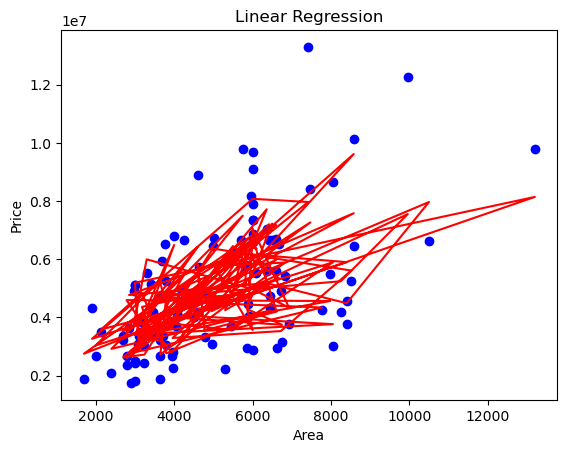

In [9]:
plt.scatter(X_test['area'], y_test, color='blue')
plt.plot(X_test['area'], y_pred, color='red')
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Linear Regression")
plt.show()
